In [1]:
import pandas
import numpy as np
# 画图prettypicture所需库
import matplotlib.pyplot as plt
import pylab as pl

# Read the data
data = pandas.read_csv('l1_6.data.csv')

# Split the data into X and y
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# import statements for the classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# TODO: Pick an algorithm from the list:
# Define a classifier (bonus: Specify some parameters!)
# and use it to fit the data

In [2]:
# 定义画图函数1（课程前面的prettyPicture）
def prettyPicture(clf, X_test, y_test):
    # 此处数据是 -2，2的范围，题目中原始的是0-1范围
    # 为了能够得示例图，变换下x_min, y_min的值
    x_min = -2.0; x_max = 2.0
    y_min = -2.0; y_max = 2.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # vscode会报pl这句的错误，但是spyder不会，实际是生效了
    # 可能是pylint误报
    # cm是colormap的函数，在matplotlib中，详见
    # https://matplotlib.org/api/cm_api.html
    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

/Users/francis/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


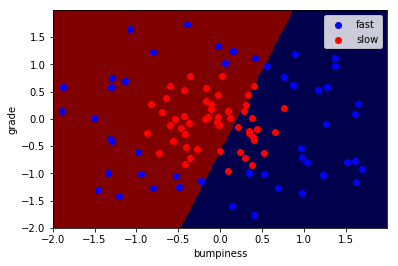

In [3]:
# - Logistic Regression
classifier = LogisticRegression()
classifier.fit(X,y)
prettyPicture(classifier, X, y)

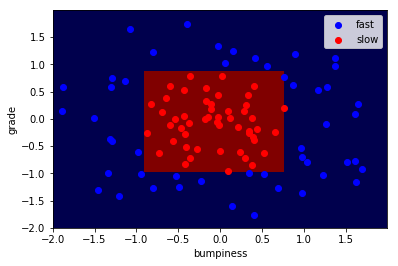

In [4]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X,y)
prettyPicture(classifier, X, y)

/Users/francis/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


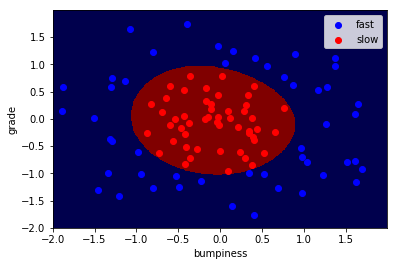

In [5]:
# Support Vector Machine Classifier
classifier = SVC()
classifier.fit(X,y)
prettyPicture(classifier, X, y)

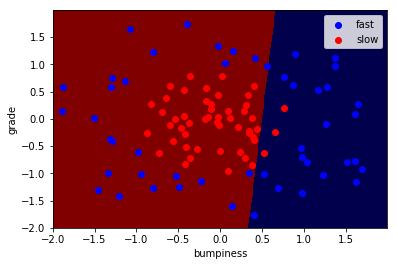

In [6]:
# linear得不出结果
classifier = SVC(kernel = 'linear', gamma = 200)
classifier.fit(X,y)
prettyPicture(classifier, X, y)

In [8]:
# poly的总跑不出来，多项式的参数日后研究
'''
classifier = SVC(kernel = 'poly', gamma = 200)
classifier.fit(X,y)
prettyPicture(classifier, X, y)
''';

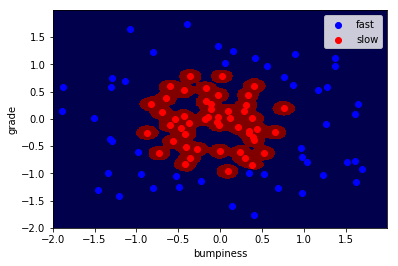

In [9]:
# The kernel that works best here is rbf, with large values of gamma.
# For example, this one:
classifier = SVC(kernel = 'rbf', gamma = 200)
classifier.fit(X,y)
prettyPicture(classifier, X, y)
# 这个一看就过拟合了（理解错了，在这节有个新的数据，存为data7.csv）

In [10]:
# data7
data = pandas.read_csv('l1_7.data.csv')

# Split the data into X and y
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

FileNotFoundError: File b'l1_7.data.csv' does not exist

In [ ]:
# 定义画图函数2（课程前面的prettyPicture）
def prettyPicture(clf, X_test, y_test):
    # 调整回0-1范围
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # vscode会报pl这句的错误，但是spyder不会，实际是生效了
    # 可能是pylint误报
    # cm是colormap的函数，在matplotlib中，详见
    # https://matplotlib.org/api/cm_api.html
    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

In [ ]:
classifier = SVC()
classifier.fit(X,y)
prettyPicture(classifier, X, y)
# 不加参数将会失败

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 200)
classifier.fit(X,y)
prettyPicture(classifier, X, y)

In [11]:
# 区分训练集和测试集
# 课程中的cross_valication已经丢弃，需要载入model_selection
# https://github.com/udacity/ud120-projects/pull/52/files
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# TODO: Use the train_test_split function to split the data into
# training and testing sets.
# The size of the testing set should be 20% of the total size of the data.
# Your output should contain 4 objects.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [12]:
# lesson2 中的几种评判方式
# 平均误差方式有正负的
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X, y)
# 线性回归得出直线
guesses = classifier.predict(X)
# 检查各点和guesses的距离
error = mean_absolute_error(y, guesses)
# 问题是绝对值不能微积分(就不能利用在梯度下降等方法上）
error

0.4931045204937146

In [13]:
# 改成平均平方误差 Mean Squred Error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X, y)
guesses = classifier.predict(X)
error = mean_squared_error(y, guesses)
error

0.2465522602468573

In [14]:
# 还有R2 Scroe，在MSE上面的基础上增加了对比（和最简单的均值方式）
from sklearn.metrics import r2_score
y_true = y
y_pred = guesses
r2_score(y_true, y_pred)
# 结果越接近1模型越好，结果是0.01模型和平均值划分比也好不了多少

0.013396317539586367